In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Covid_new.csv")
# df.head()

In [3]:
# df.columns.tolist()

In [4]:
df.rename(lambda col: col.replace('\xa0', ' '), axis='columns', inplace=True)
df.columns.tolist()

['Country,Other',
 'TotalCases',
 'TotalDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent',
 'Active Cases/1M pop']

In [5]:
df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,Active Cases/1M pop
0,Afghanistan,176229,7643.0,158429.0,10157.0,4361.0,189.0,904261,22376.0,40411760,Asia,251.0
1,Albania,272663,3485.0,268359.0,819.0,94923.0,1213.0,1760359,612837.0,2872476,Europe,285.0
2,Algeria,265432,6864.0,178050.0,80518.0,5874.0,152.0,230861,5109.0,45191206,Africa,1782.0
3,Andorra,38794,152.0,37925.0,717.0,500736.0,1962.0,249838,3224798.0,77474,Europe,9255.0
4,Angola,98927,1900.0,96857.0,170.0,2860.0,55.0,1463343,42299.0,34595276,Africa,5.0


## Percentage of each country

Text(0.5, 6.79999999999999, '%')

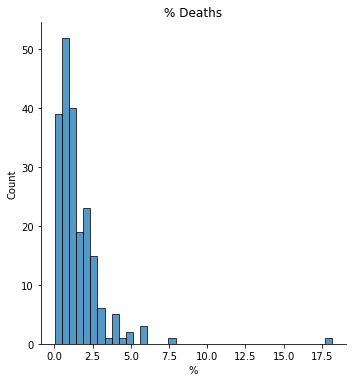

In [6]:
percent_deaths = sns.displot(x=df["TotalDeaths"] / df["TotalCases"] * 100, data=df)
plt.title("% Deaths")
plt.xlabel("%")

Đa số các nước có tỉ lệ tử vong <2.5%

Text(0.5, 6.79999999999999, '%')

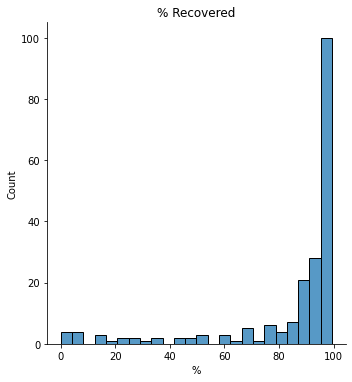

In [7]:
percent_recovered = sns.displot(x=df["TotalRecovered"] / df["TotalCases"] * 100, data=df)
plt.title("% Recovered")
plt.xlabel("%")

Đa số các nước có tỉ lệ hồi phục >90%

Text(0.5, 6.79999999999999, '%')

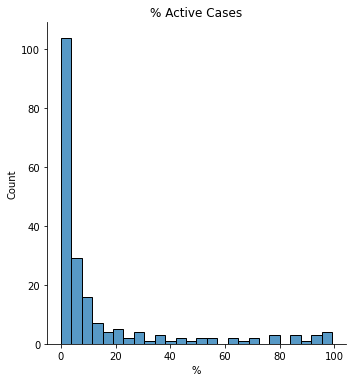

In [8]:
percent_active_cases = sns.displot(x=df["ActiveCases"] / df["TotalCases"] * 100, data=df)
plt.title("% Active Cases")
plt.xlabel("%")

Tỉ lệ người còn đang bị nhiễm ở hầu hết các nước <10%

In [9]:
df_sum = pd.DataFrame(df[['TotalDeaths', 'TotalRecovered', 'ActiveCases']].sum(), columns=["Sum"])
df_sum

,Sum
TotalDeaths,6063721.0
TotalRecovered,384160262.0
ActiveCases,52260726.0


<AxesSubplot:title={'center':'Summary of whole world'}>

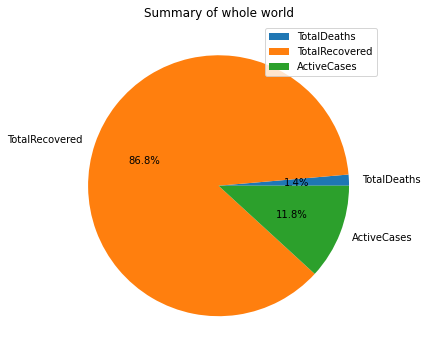

In [10]:
df_sum.plot.pie(y="Sum", legend=True, autopct='%1.1f%%', title="Summary of whole world",label="", figsize=(10,6))

## If 1M pop

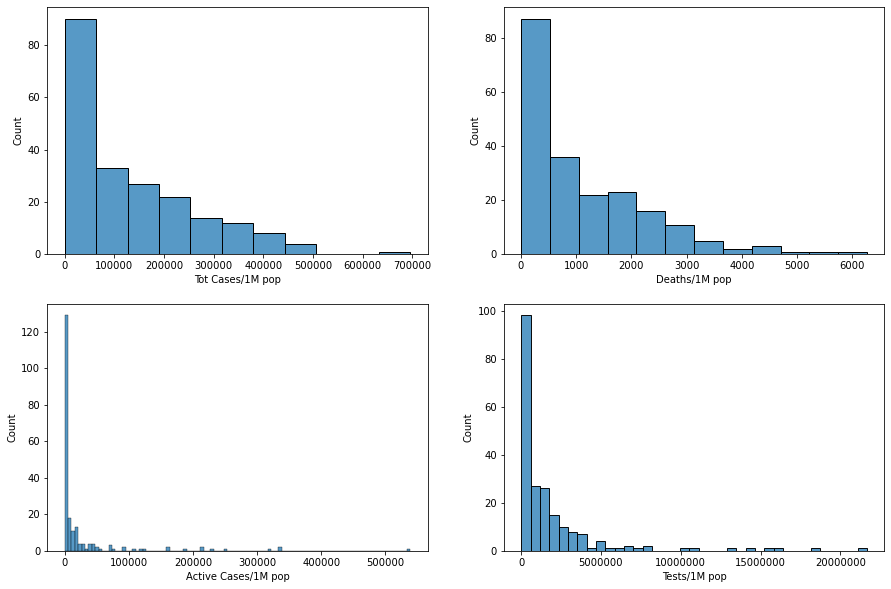

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
t = sns.histplot(ax=ax[0,0], x="Tot Cases/1M pop", data=df)
t = sns.histplot(ax=ax[0,1], x="Deaths/1M pop", data=df)
t = sns.histplot(ax=ax[1,0], x="Active Cases/1M pop", data=df)
t = sns.histplot(ax=ax[1,1], x="Tests/1M pop", data=df)
plt.ticklabel_format(style='plain') 


In [12]:
df_avg = pd.DataFrame(df[['Tot Cases/1M pop', 'Deaths/1M pop', 'Active Cases/1M pop', 'Tests/1M pop']].mean(), columns=["Avg"])
df_avg.round()

,Avg
Tot Cases/1M pop,131763.0
Deaths/1M pop,1139.0
Active Cases/1M pop,24339.0
Tests/1M pop,1793209.0


Nếu mỗi quốc gia chỉ có 1 triệu dân số trung bình các nước sẽ có tổng 131763 ca, 1139 ca tử vong, 24339 ca còn đang mắc bệnh và 1793209 lần test

## Tests and pop ratio

Text(0.5, 0, 'times')

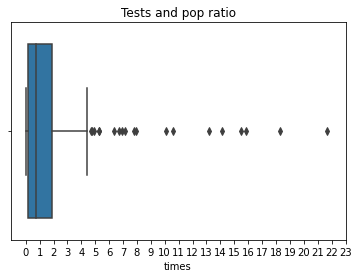

In [13]:
ratio_tests_pop = sns.boxplot(x=df["TotalTests"] / df["Population"], data=df)
plt.title("Tests and pop ratio")
plt.xticks([i for i in np.arange(0,24,1)])
plt.xlabel("times")

Đa số các nước đã gần đạt được tỉ lệ 1:1 giữa dân số và số lần test nhưng có một số nước đã có tỉ lệ test hơn 5 lần dân số 

## Group by continent

In [14]:
df["Continent"].value_counts()

Africa               53
Asia                 48
Europe               47
North America        38
South America        14
Australia/Oceania    11
Name: Continent, dtype: int64

In [15]:
df2 = df.groupby("Continent")[["TotalCases","TotalDeaths","TotalRecovered","ActiveCases"]].sum()

In [16]:
df2

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
Continent,,,,
Africa,11549788,250619.0,10691430.0,543407.0
Asia,126273240,1372640.0,111576064.0,6778478.0
Australia/Oceania,4139201,7601.0,3652241.0,479359.0
Europe,165136189,1739080.0,141540578.0,17069185.0
North America,95682180,1425714.0,68862238.0,25384412.0
South America,55245175,1268067.0,47837711.0,2005885.0


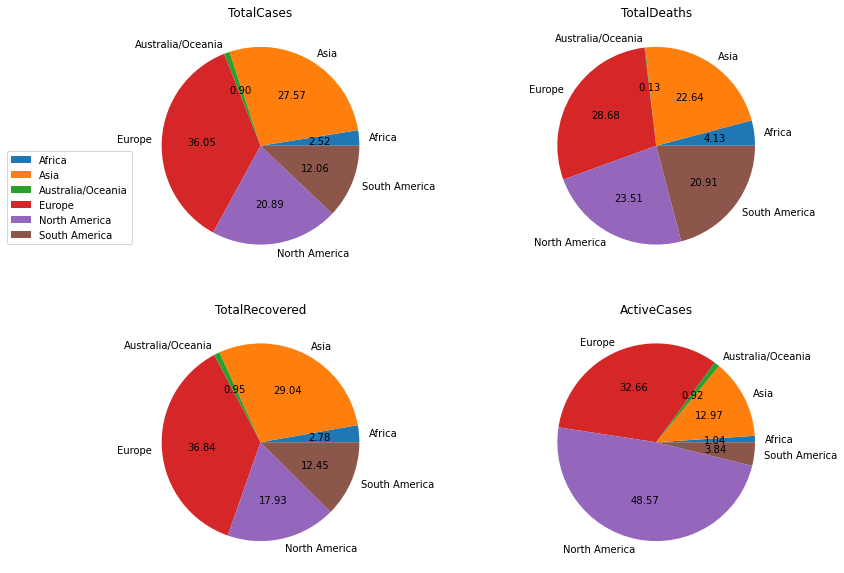

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
for ax, col in zip(axes.flat, df2.columns):
    ax.pie(df2[col], labels=df2.index, autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')

axes[0, 0].legend(bbox_to_anchor=(0, 0.5))

plt.show()

Châu âu là nơi đứng đầu về số ca nhiễm, ca tử vong, ca hồi phục, đứng thứ 2 về số lượng ca còn đang nhiễm bệnh
Bắc Mỹ chỉ chiếm 20.89% về số ca nhiễm nhưng lại đang có tới 48.57% cao nhất về số lượng ca còn đang nhiễm bệnh
liên hệ ...

## Mối tương quan

In [18]:
df.corr()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Active Cases/1M pop
TotalCases,1.000000,0.927046,0.985778,0.813506,0.111368,0.210071,0.892942,0.057782,0.436916,0.011777
TotalDeaths,0.927046,1.000000,0.928510,0.729807,0.032599,0.284375,0.770954,-0.009642,0.425875,-0.014903
TotalRecovered,0.985778,0.928510,1.000000,0.704264,0.112097,0.224105,0.896330,0.065295,0.488100,-0.007799
ActiveCases,0.813506,0.729807,0.704264,1.000000,0.093026,0.143430,0.680638,0.043162,0.154649,0.085761
Tot Cases/1M pop,0.111368,0.032599,0.112097,0.093026,1.000000,0.502150,0.107993,0.616468,-0.140302,0.498980
Deaths/1M pop,0.210071,0.284375,0.224105,0.143430,0.502150,1.000000,0.140524,0.168994,-0.079499,0.038667
TotalTests,0.892942,0.770954,0.896330,0.680638,0.107993,0.140524,1.000000,0.209997,0.543481,-0.000016
Tests/1M pop,0.057782,-0.009642,0.065295,0.043162,0.616468,0.168994,0.209997,1.000000,-0.085388,0.337363
Population,0.436916,0.425875,0.488100,0.154649,-0.140302,-0.079499,0.543481,-0.085388,1.000000,-0.065712
Active Cases/1M pop,0.011777,-0.014903,-0.007799,0.085761,0.498980,0.038667,-0.000016,0.337363,-0.065712,1.000000


<AxesSubplot:xlabel='TotalRecovered', ylabel='TotalDeaths'>

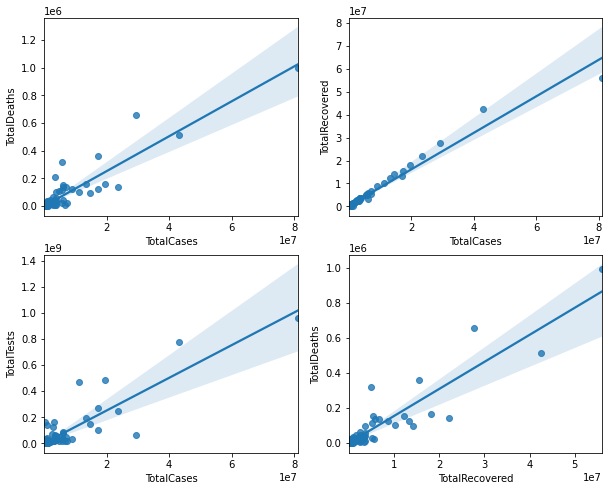

In [19]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
sns.regplot(ax=ax[0,0], x="TotalCases", y="TotalDeaths", data=df)
sns.regplot(ax=ax[0,1], x="TotalCases", y="TotalRecovered", data=df)
sns.regplot(ax=ax[1,0], x="TotalCases", y="TotalTests", data=df)
sns.regplot(ax=ax[1,1], x="TotalRecovered", y="TotalDeaths", data=df)